In [3]:
#importing needed libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading the dataset:
autoMPG = pd.read_csv('auto-mpg.csv')
autoMPG

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [7]:
#checking the dataset for nulls:
autoMPG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
#getting column names:
autoMPG.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

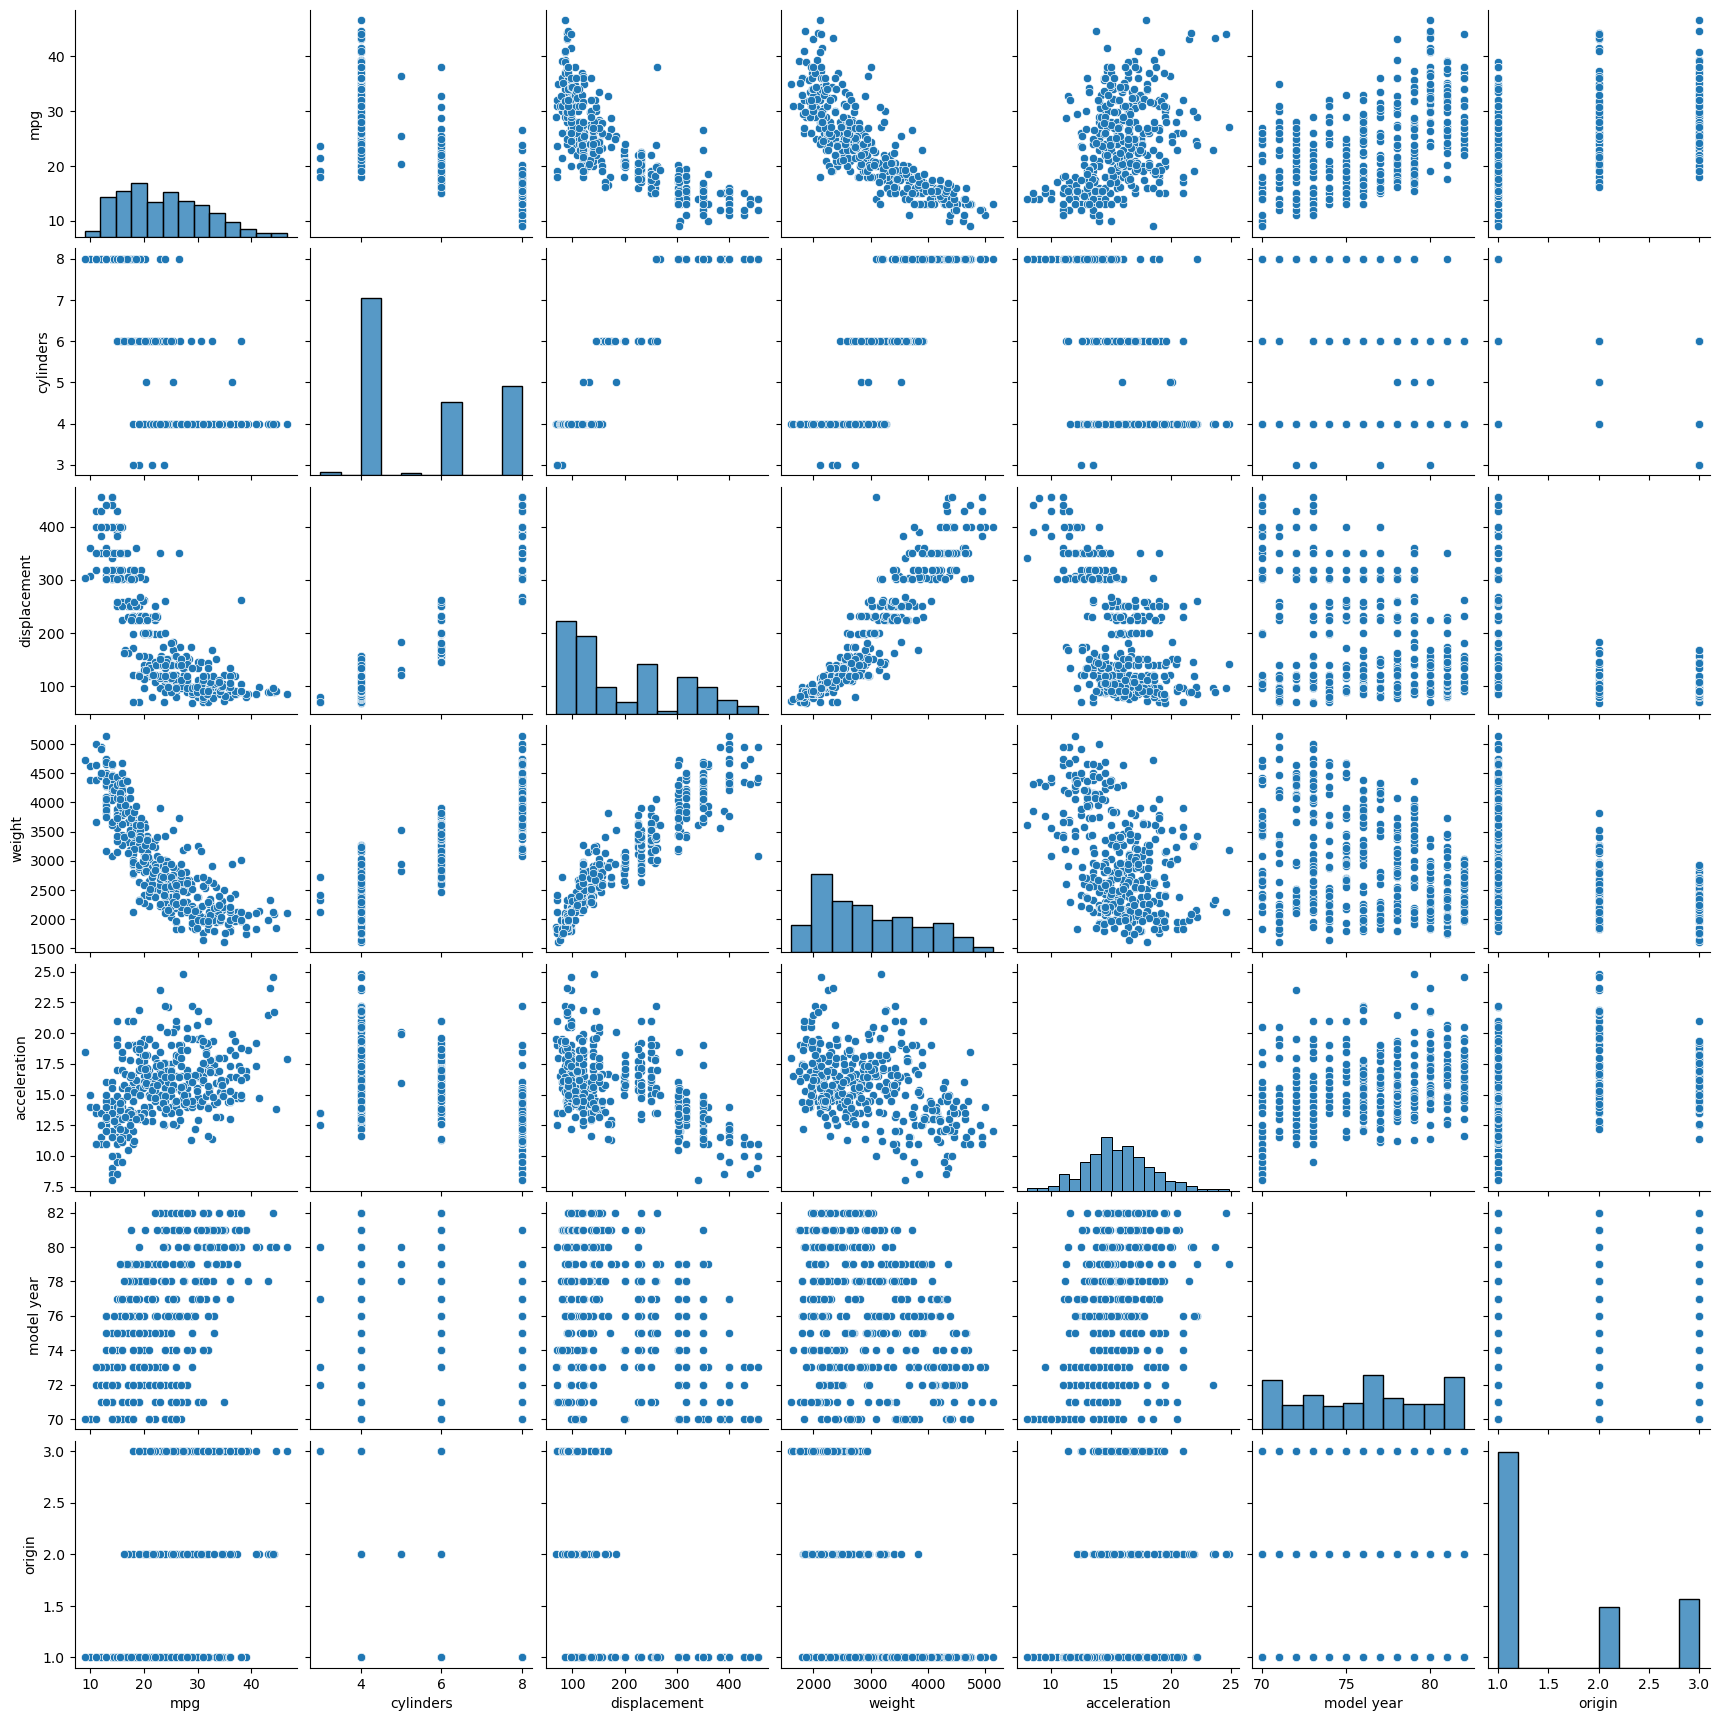

In [17]:
#generating all available correlations between variables:
sns.pairplot(autoMPG)

In [11]:
#removing an unnecessary column that is a string:
autoMPG2 = autoMPG.iloc[:,:8]
autoMPG2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [13]:
#converting horsepower column to float because it was preventing heatmap:
autoMPG2['horsepower'] = pd.to_numeric(autoMPG2['horsepower'], errors='coerce')
autoMPG2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


<Axes: >

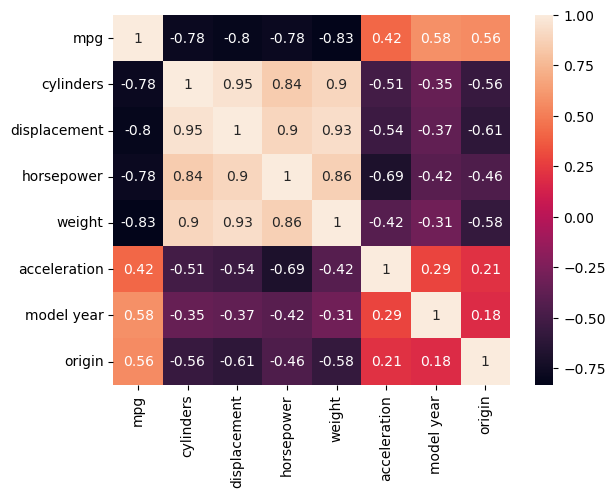

In [47]:
#determinig strong and weak correlations:
sns.heatmap(autoMPG2.corr(), annot=True)

In [107]:
!pip install scikit-learn

In [15]:
autoMPG3=autoMPG2.dropna()


In [17]:
autoMPG3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [19]:
# first i will try to manually write an algorithm for only one feature (weight):
def square_trick(base_mpg, mpg_per_kg, weight, mpg, learning_rate):
    predicted_mpg = base_mpg + mpg_per_kg*weight

    mpg_per_kg += learning_rate * (mpg-predicted_mpg) * weight
    base_mpg     += learning_rate * (mpg-predicted_mpg)

    return mpg_per_kg, base_mpg

In [21]:
import numpy as np
import matplotlib
from matplotlib import pyplot

def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=5000):
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    pyplot.scatter(X, y)
    pyplot.xlabel('mpg_per_kg')
    pyplot.ylabel('mpg')


Epoch 0: Weight=3651, MPG=20.0
Updated: MPG per Kg=-0.0027382500000000002, Base MPG=34.99999925
Epoch 1: Weight=2130, MPG=44.0
Updated: MPG per Kg=-0.0011585915988750004, Base MPG=34.99999999162367
Epoch 2: Weight=2155, MPG=30.0
Updated: MPG per Kg=-0.0014283151804741771, Base MPG=34.99999986646191
Epoch 3: Weight=2672, MPG=25.0
Updated: MPG per Kg=-0.002254436352159961, Base MPG=34.99999955728483
Epoch 4: Weight=3632, MPG=16.0
Updated: MPG per Kg=-0.004217874981645118, Base MPG=34.999999016690495
Epoch 5: Weight=3445, MPG=17.7
Updated: MPG per Kg=-0.004694907525818116, Base MPG=34.99999887821951
Epoch 6: Weight=3735, MPG=19.4
Updated: MPG per Kg=-0.004333456499357808, Base MPG=34.999998974993545
Epoch 7: Weight=3270, MPG=19.0
Updated: MPG per Kg=-0.004632595481670098, Base MPG=34.99999888351373
Epoch 8: Weight=4440, MPG=15.0
Updated: MPG per Kg=-0.0045063385194375645, Base MPG=34.99999891194999
Epoch 9: Weight=1985, MPG=32.8
Updated: MPG per Kg=-0.0038368890268110573, Base MPG=34.9999

(-0.004650727761408448, 35.000042338717684)

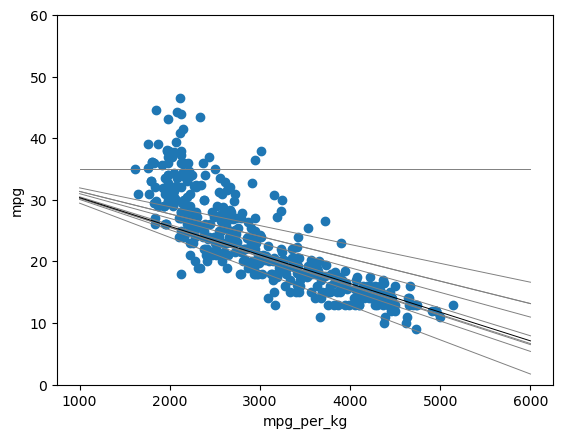

In [23]:
import random
import matplotlib.pyplot as plt
import pandas as pd

# Ensure utils2 and square_trick are correctly defined or imported
import utils2

# Set the random seed
random.seed(0)

features = autoMPG3[['weight']]
labels = autoMPG3['mpg']

def linear_regression(features, labels, learning_rate=0.00000005, epochs=1000):
    mpg_per_kg = 0.0  # Starting weight
    base_mpg = 35    # Starting bias
    for epoch in range(epochs):
        if epoch % 100 == 0:  # Example to visualize progress every 100 epochs
            utils2.draw_line(mpg_per_kg, base_mpg, 'grey', starting=1000, ending=6000)
        i = random.randint(0, len(features) - 1)
        weight = features.iloc[i, 0]  # Get a single value from the DataFrame
        mpg = labels.iloc[i]
        
        # Debugging output to trace values
        print(f"Epoch {epoch}: Weight={weight}, MPG={mpg}")
        
        # Apply the square_trick function
        mpg_per_kg, base_mpg = square_trick(base_mpg, mpg_per_kg, weight, mpg, learning_rate=learning_rate)
        
        # Debugging output to trace values
        print(f"Updated: MPG per Kg={mpg_per_kg}, Base MPG={base_mpg}")
    
    # Final plot
    utils2.draw_line(mpg_per_kg, base_mpg, 'black', starting=1000, ending=6000)
    utils2.plot_points(features, labels)
    print('MPG per Kg:', mpg_per_kg)
    print('Base MPG:', base_mpg)
    return mpg_per_kg, base_mpg

# Set the y-axis limit
plt.ylim(0, 60)

# Call the function
linear_regression(features, labels, learning_rate=0.00000005, epochs=1000)

In [25]:
#trying to fit for all (7) features:
# Define the `square_trick` function (example placeholder)
def square_trick(base_mpg, weights, features, mpg, learning_rate=0.00000005):
    predicted_mpg = base_mpg + np.dot(weights, features)
    error = mpg - predicted_mpg
    weights += learning_rate * error * features
    base_mpg += learning_rate * error
    return weights, base_mpg

# Set the random seed
random.seed(0)

# Prepare features and labels
features = autoMPG3[['weight', 'horsepower', 'displacement', 'acceleration', 'model year', 'origin', 'cylinders']]
labels = autoMPG3['mpg']

def linear_regression(features, labels, learning_rate=0.0000001, epochs=1000):
    weights = np.zeros(features.shape[1])  # Initialize weights for all features
    base_mpg = -17  # Start with known bias
    for epoch in range(epochs):
        if epoch % 100 == 0:  # Example to visualize progress every 100 epochs
            # Visualization for multiple features is complex; you might skip this or use other metrics
            pass
        
        i = random.randint(0, len(features) - 1)
        feature_vector = features.iloc[i].values  # Get a vector for all features
        mpg = labels.iloc[i]
        
        # Debugging output to trace values
        print(f"Epoch {epoch}: Features={feature_vector}, MPG={mpg}")
        
        # Apply the square_trick function
        weights, base_mpg = square_trick(base_mpg, weights, feature_vector, mpg, learning_rate=learning_rate)
        
        # Debugging output to trace values
        print(f"Updated: Weights={weights}, Base MPG={base_mpg}")
    
    # No straightforward visualization for multiple features
    print('Weights:', weights)
    print('Base MPG:', base_mpg)
    return weights, base_mpg

# Call the function
linear_regression(features, labels, learning_rate=0.0000001, epochs=1000)

Epoch 0: Features=[3.651e+03 1.000e+02 2.250e+02 1.770e+01 7.600e+01 1.000e+00 6.000e+00], MPG=20.0
Updated: Weights=[1.35087e-02 3.70000e-04 8.32500e-04 6.54900e-05 2.81200e-04 3.70000e-06
 2.22000e-05], Base MPG=-16.9999963
Epoch 1: Features=[2.13e+03 5.20e+01 9.70e+01 2.46e+01 8.20e+01 2.00e+00 4.00e+00], MPG=44.0
Updated: Weights=[2.03463636e-02 5.36928877e-04 1.14388656e-03 1.44460200e-04
 5.44433999e-04 1.01203414e-05 3.50406829e-05], Base MPG=-16.999993089829285
Epoch 2: Features=[2.155e+03 8.000e+01 1.110e+02 1.480e+01 7.700e+01 1.000e+00 4.000e+00], MPG=30.0
Updated: Weights=[2.09798138e-02 5.60444430e-04 1.17651439e-03 1.48810577e-04
 5.67067718e-04 1.04142858e-05 3.62164605e-05], Base MPG=-16.99999279588488
Epoch 3: Features=[2.672e+03 8.700e+01 1.100e+02 1.750e+01 7.000e+01 2.000e+00 4.000e+00], MPG=25.0
Updated: Weights=[1.71645426e-02 4.36219656e-04 1.01944858e-03 1.23822835e-04
 4.67116751e-04 7.55854392e-06 3.05049766e-05], Base MPG=-16.999994223755838
Epoch 4: Features

(array([ 0.01178541, -0.00604894, -0.06500173,  0.00960642,  0.03812268,
         0.0015457 ,  0.00015541]),
 -16.999531186255854)

E:\Programs\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


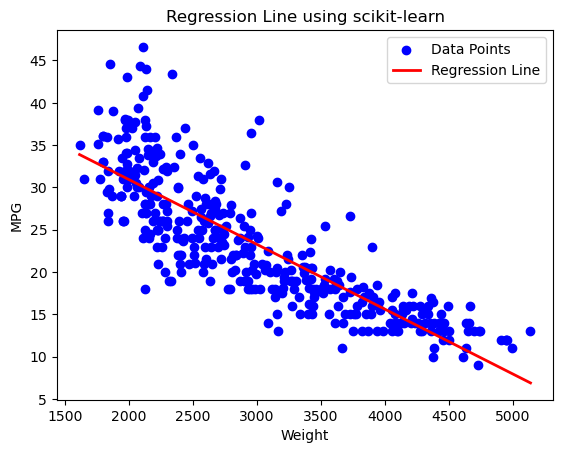

In [247]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

# Example data (replace with your data)

features = autoMPG3[['weight']]  # Features should be a 2D array
labels = autoMPG3['mpg']

# Create and fit the model
model = LinearRegression()
model.fit(features, labels)

# Make predictions
weight_range = np.linspace(features['weight'].min(), features['weight'].max(), 100).reshape(-1, 1)
predictions = model.predict(weight_range)



# Plot data points
plt.scatter(features, labels, color='blue', label='Data Points')

# Plot regression line
plt.plot(x_range, predictions, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Regression Line using scikit-learn')
plt.legend()

# Show the plot
plt.show()

In [307]:
#now i will use regression on all features:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
!pip install  sklearn.inspection
# Example data (replace with your data)

features = autoMPG3[['cylinders', 'displacement', 'horsepower','weight', 'acceleration','model year','origin']]  # Features should be a 2D array
labels = autoMPG3['mpg']

model = LinearRegression()
model.fit(features, labels)

# Get the coefficients
coefficients = pd.DataFrame(model.coef_, features.columns, columns=['Coefficient'])
print(coefficients)

intercept = model.intercept_
print(f"Intercept (Base MPG): {intercept}")

# Predictions
predictions = model.predict(features)

# Calculate metrics
mse = mean_squared_error(labels, predictions)
r2 = r2_score(labels, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

              Coefficient
cylinders       -0.493376
displacement     0.019896
horsepower      -0.016951
weight          -0.006474
acceleration     0.080576
model year       0.750773
origin           1.426140
Intercept (Base MPG): -17.21843462201755
Mean Squared Error: 10.847480945000456
R² Score: 0.8214780764810597


ERROR: Could not find a version that satisfies the requirement sklearn.inspection (from versions: none)
ERROR: No matching distribution found for sklearn.inspection
